age: 0 null values
gender: 0 null values
Age – basic stats:


count    682.000000
mean      51.266862
std       19.578804
min        1.000000
25%       40.000000
50%       54.000000
75%       67.000000
max       89.000000
Name: age, dtype: float64

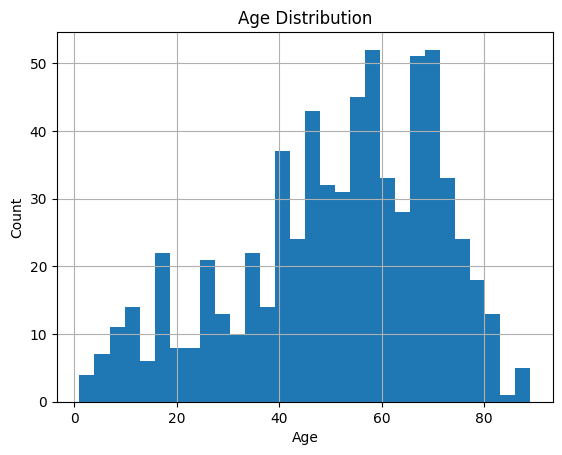

Invalid ages (>110 or <0): 0
Unique genders: {'M', 'F'}
Validation completed successfully – age and gender columns are clean.


In [2]:
# 1 ▸ Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 ▸ Load the cleaned dataset
df = pd.read_parquet("../../data/processed/incidents_clean.parquet")

# 3 ▸ Basic sanity checks ----------------------------------------------------

def check_nulls(col):
    n_nulls = df[col].isna().sum()
    print(f"{col}: {n_nulls} null values")
    assert n_nulls == 0, f"{col} still contains nulls"

check_nulls("age")
check_nulls("gender")

# 4 ▸ Age quality ------------------------------------------------------------

print("Age – basic stats:")
display(df["age"].describe())

# Optional: plot distribution
df["age"].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

# Flag implausible ages (e.g. outside 0–110)
invalid_age_mask = (df["age"] < 0) | (df["age"] > 110)
n_invalid = invalid_age_mask.sum()
print(f"Invalid ages (>110 or <0): {n_invalid}")
assert n_invalid == 0, "Found implausible ages"

# 5 ▸ Gender quality ---------------------------------------------------------

valid_genders = {"M", "F"}
unique_genders = set(df["gender"].dropna().unique())
print(f"Unique genders: {unique_genders}")
extra_genders = unique_genders - valid_genders
assert not extra_genders, f"Unexpected gender values: {extra_genders}"

# 6 ▸ Summary ----------------------------------------------------------------
print("Validation completed successfully – age and gender columns are clean.")
